In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel("data_project2.xlsx")
data

,Gene Name,Annotation,Accession #,Probe Name,Class Name,Species Name,20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,...,20151118_CAN IMMUN PROF PREOP2_NYU 789GR_06.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 957GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1005GR_08.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1270GR_07.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 974GR_10.RCC,20151120_CAN IMM PROF 4_NYU 824GR_05.RCC,20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC
0,NaN,NaN,NaN,NaN,NaN,NaN,ADS1,ADS1,ADS1,ADS1,...,GR,GR,GR,GR,GR,GR,GR,GR,GR,GR
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2M,NaN,NM_000014.4,NM_000014.4:1685,Endogenous,Hs,14,41,29,12,...,26,15,10,6,18,67,20,13,23,7
3,ABCB1,NaN,NM_000927.3,NM_000927.3:3910,Endogenous,Hs,60,105,67,58,...,54,47,47,9,80,164,34,53,52,11
4,ABL1,NaN,NM_005157.3,NM_005157.3:3200,Endogenous,Hs,59,59,43,47,...,30,42,60,17,72,51,41,27,28,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,POS_B,NaN,ERCC_00112.1,ERCC_00112.1:695,Positive,CUS,18199,18815,22041,22288,...,16896,17385,16249,17848,18360,19100,17543,14252,17214,15418
782,POS_C,NaN,ERCC_00002.1,ERCC_00002.1:850,Positive,CUS,5266,5336,6273,6345,...,5472,5600,5055,5753,5693,5916,5290,4517,5210,4798
783,POS_D,NaN,ERCC_00092.1,ERCC_00092.1:540,Positive,CUS,1391,1278,1611,1536,...,1175,1275,1208,1236,1320,1251,1186,959,1151,1063
784,POS_E,NaN,ERCC_00035.1,ERCC_00035.1:485,Positive,CUS,225,256,291,292,...,221,233,209,234,242,282,221,168,175,174


In [3]:
ADS1_GR_index = data.iloc[[0]]
ADS1_GR_index = ADS1_GR_index.drop(columns = ['Gene Name','Annotation','Accession #','Probe Name','Class Name','Species Name'])
ADS1_GR_index = ADS1_GR_index.transpose()
ADS1_GR_index.rename(columns={0:'type'}, inplace = True)
ADS1_GR_index

,type
20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,ADS1
20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,ADS1
20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,ADS1
20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,ADS1
20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC,ADS1
...,...
20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,GR
20151119_CAN IMM PROF PREOP 3_NYU 974GR_10.RCC,GR
20151120_CAN IMM PROF 4_NYU 824GR_05.RCC,GR
20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,GR


In [4]:
df = data.set_index("Gene Name")
df = df.drop(columns = ['Annotation','Accession #','Probe Name','Class Name','Species Name'])
df = df.iloc[2:]
df

,20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU125 S1_04.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU175 S1_06.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU201 S1_05.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU50 S1_01.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU62 S1_02.RCC,...,20151118_CAN IMMUN PROF PREOP2_NYU 789GR_06.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 957GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1005GR_08.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1270GR_07.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 974GR_10.RCC,20151120_CAN IMM PROF 4_NYU 824GR_05.RCC,20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC
Gene Name,,,,,,,,,,,,,,,,,,,,,
A2M,14,41,29,12,36,26,26,14,36,30,...,26,15,10,6,18,67,20,13,23,7
ABCB1,60,105,67,58,85,49,31,28,53,34,...,54,47,47,9,80,164,34,53,52,11
ABL1,59,59,43,47,33,27,27,27,39,34,...,30,42,60,17,72,51,41,27,28,7
ADA,116,128,58,68,64,41,41,37,49,48,...,47,82,83,18,95,127,86,51,53,13
ADORA2A,93,92,97,39,61,26,116,27,25,35,...,38,49,42,8,63,101,54,32,24,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS_B,18199,18815,22041,22288,19967,19919,19433,22695,19901,21481,...,16896,17385,16249,17848,18360,19100,17543,14252,17214,15418
POS_C,5266,5336,6273,6345,5674,5715,5586,6514,5689,6223,...,5472,5600,5055,5753,5693,5916,5290,4517,5210,4798
POS_D,1391,1278,1611,1536,1317,1307,1385,1590,1386,1531,...,1175,1275,1208,1236,1320,1251,1186,959,1151,1063


In [5]:
#check NA values 
print('NA values in DF:', df.isna().sum().sum())

NA values in DF: 0


In [6]:
#split the dataset into train dataset and test dataset (80%train + 20%test)
xtrain,xtest,ytrain,ytest = \
train_test_split(df.transpose(), ADS1_GR_index.values,test_size=0.2, random_state=42)
df_train = xtrain.transpose()
df_test = xtest.transpose()
ADS1_GR_index_train = ytrain
ADS1_GR_index_test = ytest

In [7]:
xtrain

Gene Name,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,NEG_E,NEG_F,NEG_G,NEG_H,POS_A,POS_B,POS_C,POS_D,POS_E,POS_F
20150915_CAN IMMUNE PANEL_NYU89_03.RCC,3,16,21,17,15,15,14,29,10,20,...,18,12,11,21,49835,14515,4879,1070,168,82
20150609_can imm stage 1 lu ca_NYU35 S1_02.RCC,29,38,23,42,25,47,32,51,22,25,...,28,31,22,32,63953,19530,5532,1362,228,104
20150918_CANCER IMM PANEL_NYU307_03.RCC,10,22,22,22,17,13,12,82,19,10,...,29,10,13,16,45314,12055,4208,903,175,72
20150917_CANCER IMM PANEL_NYU252_02.RCC,6,19,28,15,21,11,6,49,8,14,...,22,20,14,32,41579,11679,4005,899,132,73
20150917_CANCER IMM PANEL_NYU1201_09.RCC,29,33,35,23,34,20,18,78,11,31,...,16,7,24,24,41729,11629,3879,924,157,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20151118_CAN IMMUN PROF PREOP2_NYU 696GR_07.RCC,8,15,24,28,12,26,13,31,12,23,...,27,19,18,20,56406,16853,5315,1118,233,95
20150915_CAN IMMUNE PANEL_NYU32_01.RCC,8,17,17,15,9,15,11,24,13,25,...,20,13,14,11,44265,12093,4185,905,136,86
20150527_cancer imm panel2_NYU1641GR_11.RCC,24,48,52,68,52,23,29,154,43,30,...,28,21,19,25,68854,22583,6555,1407,266,125
20150921_CAN IMM PAN_NYU353_04.RCC,6,19,24,25,10,13,14,38,5,21,...,20,14,12,22,30411,9558,3338,647,91,67


In [8]:
ADS1_GR_index_train.reshape(1,-1)

array([['ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1',
        'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1',
        'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'ADS1', 'ADS1', 'ADS1',
        'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1',
        'ADS1', 'ADS1', 'GR', 'GR', 'ADS1', 'ADS1', 'GR', 'ADS1', 'ADS1',
        'GR', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'GR', 'GR',
        'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1',
        'GR', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'ADS1', 'ADS1', 'GR',
        'ADS1', 'ADS1', 'GR', 'ADS1', 'ADS1', 'GR', 'ADS1', 'ADS1',
        'ADS1', 'ADS1', 'ADS1', 'GR', 'GR', 'GR', 'ADS1', 'GR', 'GR',
        'GR', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'ADS1', 'GR']],
      dtype=object)

In [9]:
df_test

,20150915_CAN IMMUNE PANEL_NYU253_09.RCC,20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC,20150916_CANCER IMM PANEL _NYU741_10.RCC,20150921_CAN IMM PAN_NYU442_11.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU68 S1_03.RCC,20150522_immune panel1_NYU1572GR_09.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU838 S1_08.RCC,20150602_CANCER IMM PAN3_NYU1508 GR_10.RCC,20150921_CAN IMM PAN_NYU355_05.RCC,20150915_CAN IMMUNE PANEL_NYU113_05.RCC,...,20150916_CANCER IMM PANEL _NYU154_02.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,20150609_can imm stage 1 lu ca_NYU272 S1_07.RCC,20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,20150916_CANCER IMM PANEL _NYU656_07.RCC,20151117_CAN IMM PROF PREOP 1_NYU 685GR_09.RCC,20150609_can imm stage 1 lu ca_NYU330 S1_09.RCC,20150527_cancer imm panel2_NYU1471GR_08.RCC,20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,20150915_CAN IMMUNE PANEL_NYU116_06.RCC
Gene Name,,,,,,,,,,,,,,,,,,,,,
A2M,7,36,9,6,20,15,16,12,37,4,...,5,14,94,67,7,41,21,23,23,6
ABCB1,27,85,38,13,17,31,38,201,58,8,...,18,60,316,164,15,185,27,97,52,12
ABL1,43,33,30,26,24,38,35,98,25,16,...,20,59,110,51,24,75,22,72,28,21
ADA,21,64,33,25,32,59,29,160,33,13,...,13,116,250,127,21,186,37,147,53,21
ADORA2A,19,61,23,14,33,42,22,94,29,9,...,11,93,215,101,11,95,38,71,24,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS_B,13097,19967,11816,10672,20208,15419,21422,17762,10589,13271,...,11636,18199,18024,19100,13631,12231,19723,19983,17214,13509
POS_C,4485,5674,4015,3635,5784,4409,6301,5048,3702,4531,...,3910,5266,5152,5916,4676,4338,5562,5667,5210,4702
POS_D,1033,1317,899,612,1443,1111,1589,1225,717,996,...,858,1391,1266,1251,1097,1106,1348,1304,1151,1000


In [10]:
ADS1_GR_index_test.reshape(1,-1)

array([['ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR',
        'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'GR', 'ADS1', 'ADS1',
        'ADS1', 'GR', 'ADS1', 'GR', 'ADS1', 'GR', 'GR', 'ADS1']],
      dtype=object)

In [11]:
#data standardisation and .......
df_train = xtrain.transpose()
df_test = xtest.transpose()
df_train = df_train.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1)
df_test = df_test.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1)
df_train

,20150915_CAN IMMUNE PANEL_NYU89_03.RCC,20150609_can imm stage 1 lu ca_NYU35 S1_02.RCC,20150918_CANCER IMM PANEL_NYU307_03.RCC,20150917_CANCER IMM PANEL_NYU252_02.RCC,20150917_CANCER IMM PANEL_NYU1201_09.RCC,20150916_CANCER IMM PANEL _NYU232_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20150609_can imm stage 1 lu ca_NYU221 S1_06.RCC,20150918_CANCER IMM PANEL_NYU1486_09.RCC,20150918_CANCER IMM PANEL_NYU305_02.RCC,...,20150522_immune panel1_NYU1384GR_07.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC,20150916_CANCER IMM PANEL _NYU178_04.RCC,20150917_CANCER IMM PANEL_NYU888_07.RCC,20150609_can imm stage 1 lu ca_NYU49 S1_03.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 696GR_07.RCC,20150915_CAN IMMUNE PANEL_NYU32_01.RCC,20150527_cancer imm panel2_NYU1641GR_11.RCC,20150921_CAN IMM PAN_NYU353_04.RCC,20151117_CAN IMM PROF PREOP 1_NYU 775GR_08.RCC
Gene Name,,,,,,,,,,,,,,,,,,,,,
A2M,-1.182960,1.230877,-0.533081,-0.904440,1.230877,-0.811600,0.209638,0.302478,-0.625921,-0.161721,...,1.323717,-0.811600,-0.533081,-0.533081,-0.254561,-0.718760,-0.718760,0.766678,-0.904440,-0.811600
ABCB1,-0.725283,-0.094897,-0.553360,-0.639321,-0.238166,-0.782591,1.108568,1.710300,-0.667975,-0.553360,...,0.306258,-0.868553,-0.725283,-0.524706,0.420874,-0.753937,-0.696629,0.191642,-0.639321,-0.467398
ABL1,-0.768787,-0.658707,-0.713747,-0.383506,0.001775,-1.209109,2.038263,1.322740,-0.603667,-0.438546,...,0.937459,-1.539350,-0.493586,-0.438546,-0.493586,-0.603667,-0.988948,0.937459,-0.603667,-0.658707
ADA,-0.786532,-0.094634,-0.648153,-0.841884,-0.620477,-0.814208,1.372191,1.621274,-0.509773,-0.648153,...,1.095432,-0.897236,-1.007940,-0.509773,-0.205338,-0.482097,-0.841884,0.624941,-0.565125,-0.454421
ADORA2A,-0.621947,-0.342251,-0.566008,-0.454129,-0.090525,-0.845703,0.720592,1.559679,-0.677886,-0.566008,...,0.748562,-0.482099,-0.733825,-0.538038,0.496836,-0.705855,-0.789764,0.412927,-0.761795,-0.621947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS_B,-0.206202,1.010419,-0.802989,-0.894205,-0.906335,-0.514056,0.726581,0.715179,-0.665679,-0.731180,...,1.386201,0.012863,-0.204261,-1.009438,1.313422,0.360989,-0.793770,1.751065,-1.408752,0.776313
POS_C,0.076504,0.769631,-0.635729,-0.851203,-0.984946,-0.374612,0.940525,0.409800,-0.633606,-0.880924,...,1.459574,-0.009473,-0.022211,-0.884108,1.295049,0.539297,-0.660142,1.855495,-1.559191,0.833318
POS_D,-0.110335,1.012699,-0.752618,-0.768002,-0.671852,-0.368017,0.851166,0.628098,-0.579547,-0.368017,...,1.804976,-0.137257,0.097349,-0.921842,1.316533,0.074273,-0.744926,1.185769,-1.737195,-0.021877


In [12]:
train_ADS1 = []
train_GR =[]
for i in range(len(df_train.columns)):
    if ADS1_GR_index_train[i] == ['ADS1']:
        train_ADS1.append(df_train.columns[i])
    if ADS1_GR_index_train[i] == ['GR']:
        train_GR.append(df_train.columns[i]) 
df_train = df_train[train_ADS1+train_GR]

In [13]:
#number of ADS1
len(train_ADS1)

66

In [14]:
#number of GR
len(train_GR)

27

In [15]:
#calculate the similarity
df_train[['ADS1_mean', 'ADS1_std']] = df_train[train_ADS1].agg(['mean', 'std'], axis=1)
df_train[['GR_mean', 'GR_std']] = df_train[train_GR].agg(['mean', 'std'], axis=1)
def welch_t_test(row):
    return (
        (row['ADS1_mean'] - row['GR_mean']) / 
        np.sqrt(
            row['ADS1_std']/len(train_ADS1) + row['GR_std']/len(train_GR)
        )
    )
df_train['similarity'] = \
df_train[['ADS1_mean', 'ADS1_std', 'GR_mean', 'GR_std']].apply(welch_t_test, axis=1)
df_train

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,20150915_CAN IMMUNE PANEL_NYU89_03.RCC,20150609_can imm stage 1 lu ca_NYU35 S1_02.RCC,20150918_CANCER IMM PANEL_NYU307_03.RCC,20150917_CANCER IMM PANEL_NYU252_02.RCC,20150917_CANCER IMM PANEL_NYU1201_09.RCC,20150916_CANCER IMM PANEL _NYU232_06.RCC,20150609_can imm stage 1 lu ca_NYU221 S1_06.RCC,20150918_CANCER IMM PANEL_NYU1486_09.RCC,20150918_CANCER IMM PANEL_NYU305_02.RCC,20150915_CAN IMMUNE PANEL_NYU408_10.RCC,...,20150522_immune panel1_NYU1384GR_07.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 696GR_07.RCC,20150527_cancer imm panel2_NYU1641GR_11.RCC,20151117_CAN IMM PROF PREOP 1_NYU 775GR_08.RCC,ADS1_mean,ADS1_std,GR_mean,GR_std,similarity
Gene Name,,,,,,,,,,,,,,,,,,,,,
A2M,-1.182960,1.230877,-0.533081,-0.904440,1.230877,-0.811600,0.302478,-0.625921,-0.161721,3.366195,...,1.323717,-0.811600,-0.718760,0.766678,-0.811600,-0.056221,1.118698,0.137430,0.648518,-0.956734
ABCB1,-0.725283,-0.094897,-0.553360,-0.639321,-0.238166,-0.782591,1.710300,-0.667975,-0.553360,0.993952,...,0.306258,-0.868553,-0.753937,0.191642,-0.467398,-0.157849,0.945509,0.385852,1.060235,-2.348565
ABL1,-0.768787,-0.658707,-0.713747,-0.383506,0.001775,-1.209109,1.322740,-0.603667,-0.438546,0.276977,...,0.937459,-1.539350,-0.603667,0.937459,-0.658707,-0.221721,0.950086,0.541985,0.943624,-3.438015
ADA,-0.786532,-0.094634,-0.648153,-0.841884,-0.620477,-0.814208,1.621274,-0.509773,-0.648153,-0.039282,...,1.095432,-0.897236,-0.482097,0.624941,-0.454421,-0.334911,0.819912,0.818672,0.956846,-5.272968
ADORA2A,-0.621947,-0.342251,-0.566008,-0.454129,-0.090525,-0.845703,1.559679,-0.677886,-0.566008,0.133231,...,0.748562,-0.482099,-0.705855,0.412927,-0.621947,-0.150278,0.972562,0.367347,1.007357,-2.268949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS_B,-0.206202,1.010419,-0.802989,-0.894205,-0.906335,-0.514056,0.715179,-0.665679,-0.731180,-0.414592,...,1.386201,0.012863,0.360989,1.751065,0.776313,-0.251005,0.954001,0.613567,0.866458,-4.007392
POS_C,0.076504,0.769631,-0.635729,-0.851203,-0.984946,-0.374612,0.409800,-0.633606,-0.880924,-0.290758,...,1.459574,-0.009473,0.539297,1.855495,0.833318,-0.229917,0.916602,0.562020,1.007136,-3.500267
POS_D,-0.110335,1.012699,-0.752618,-0.768002,-0.671852,-0.368017,0.628098,-0.579547,-0.368017,-0.533395,...,1.804976,-0.137257,0.074273,1.185769,-0.021877,-0.210739,1.006895,0.515140,0.808714,-3.413929


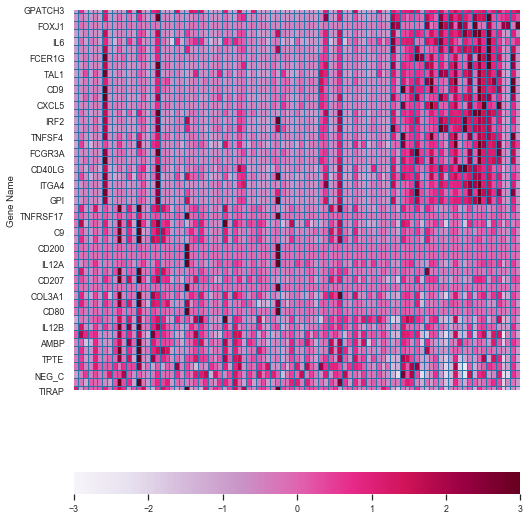

In [16]:
df_train_sorted = df_train.sort_values('similarity').\
drop(columns=['ADS1_mean', 'ADS1_std', 'GR_mean', 'GR_std', 'similarity'])
df_train_features = df_train_sorted.head(25).append(df_train_sorted.tail(25))
sns.set(font_scale=0.8)
plt.figure(figsize=(8,10))
sns.heatmap(cmap="PuRd", vmin=-3, vmax=3, center=0, data=df_train_features, \
            xticklabels=False, linewidth=0.004, linecolor="#2874A6",\
            cbar_kws={"orientation": "horizontal"})

In [17]:
# FROM SKLEARN DOCS: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

# THIS FUNCTION DOES NOT WORK WELL WITH ONLY 2 CLASSES

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print(cm.shape)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(-0.5, cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [18]:
def plot_lda(ypred, xtest, ytest, lw = 2):
    ypred = ypred
    confusion_matrix = []
    for i in range(len(ytest)):
        if ytest[i] == 'ADS1' and ypred[i] == 'ADS1':
            confusion_matrix.append(0)
        if ytest[i] == 'ADS1' and ypred[i] == 'GR':
            confusion_matrix.append(1)
        if ytest[i] == 'GR' and ypred[i] == 'ADS1':
            confusion_matrix.append(2)
        if ytest[i] == 'GR' and ypred[i] == 'GR':
            confusion_matrix.append(3)
    X = xtest.values
    y = np.array(confusion_matrix)
    target_names = np.array(['TP','FN','FP','TN'])
    lda = LDA(n_components=2)
    X_r2 = lda.fit(X, y).transform(X)
    colors = ['blue', 'red','orange', 'green']
    lw = lw
    plt.figure()
    for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA')
    plt.show()
    return None
def plot_pca(ypred, xtest, ytest, lw = 2):
    ypred = ypred
    confusion_matrix = []
    for i in range(len(ytest)):
        if ytest[i] == 'ADS1' and ypred[i] == 'ADS1':
            confusion_matrix.append(0)
        if ytest[i] == 'ADS1' and ypred[i] == 'GR':
            confusion_matrix.append(1)
        if ytest[i] == 'GR' and ypred[i] == 'ADS1':
            confusion_matrix.append(2)
        if ytest[i] == 'GR' and ypred[i] == 'GR':
            confusion_matrix.append(3)
    X = xtest.values
    y = np.array(confusion_matrix)
    target_names = np.array(['TP','FN','FP','TN'])
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)
    colors = ['blue', 'red','orange', 'green']
    lw = lw
    plt.figure()
    for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, color=color, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA')
    plt.show()
    return None

In [19]:
#K-nearest Neighbors
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(xtrain, ytrain)
knn_predict = clf.predict(xtest)
knn_predict

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array(['ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'ADS1',
       'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'ADS1', 'ADS1', 'GR',
       'ADS1', 'GR', 'ADS1', 'GR', 'ADS1', 'ADS1'], dtype=object)

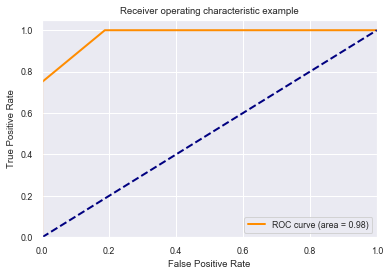

In [20]:
y_score = clf.predict_proba(xtest)[:,1]
y_test = ytest
y_test = [0 if x == 'ADS1' else x for x in y_test]
y_test = [1 if x == 'GR' else x for x in y_test]
pred = clf.predict(xtest).tolist()
pred = [0 if x == 'ADS1' else x for x in pred]
pred = [1 if x == 'GR' else x for x in pred]
class_names = np.array(['GR', 'ADS1'])
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[16  0]
 [ 2  6]]
(2, 2)


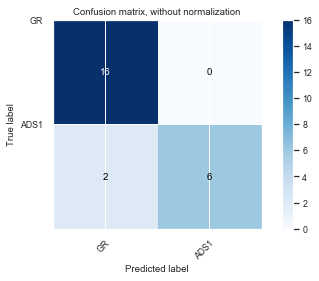

In [21]:
_ = plot_confusion_matrix(y_test, pred, class_names)

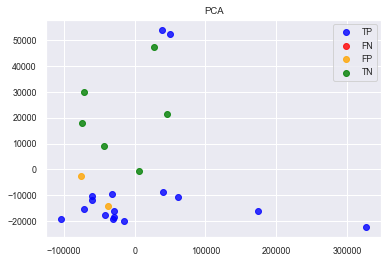

In [22]:
ypred = clf.predict(xtest).tolist()
xtest = xtest
y_test = ytest.tolist()
plot_pca(ypred, xtest, ytest)

In [23]:
#Random Forest Classifier

In [24]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(xtrain, ytrain)
rf_predict = clf.predict(xtest)
rf_predict

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array(['ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'ADS1',
       'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'ADS1', 'GR',
       'ADS1', 'GR', 'ADS1', 'GR', 'GR', 'ADS1'], dtype=object)

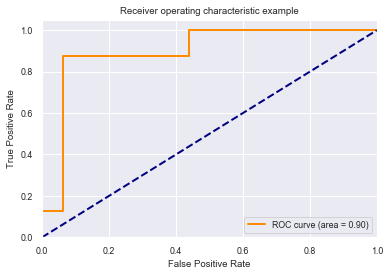

In [25]:
y_score = clf.predict_proba(xtest)[:,1]
y_test = ytest
y_test = [0 if x == 'ADS1' else x for x in y_test]
y_test = [1 if x == 'GR' else x for x in y_test]
pred = clf.predict(xtest).tolist()
pred = [0 if x == 'ADS1' else x for x in pred]
pred = [1 if x == 'GR' else x for x in pred]
class_names = np.array(['GR', 'ADS1'])
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[15  1]
 [ 1  7]]
(2, 2)


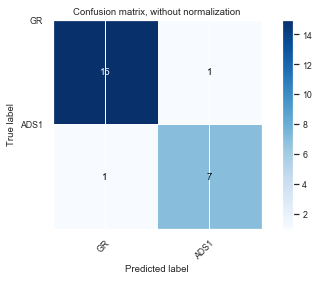

In [26]:
_ = plot_confusion_matrix(y_test, pred, class_names)

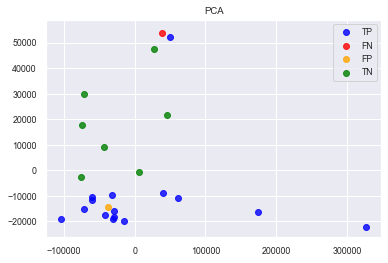

In [27]:
ypred = clf.predict(xtest).tolist()
xtest = xtest
ytest = ytest
plot_pca(ypred, xtest, ytest)

In [28]:
#Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(xtrain, ytrain)
gnb_predict = clf.predict(xtest)
gnb_predict

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'ADS1',
       'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'GR', 'GR',
       'ADS1', 'GR', 'ADS1', 'GR', 'GR', 'ADS1'], dtype='<U4')

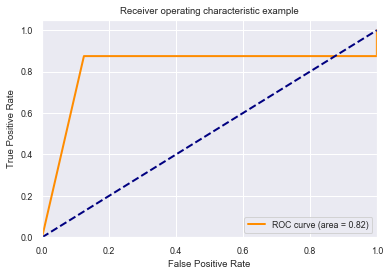

In [29]:
y_score = clf.predict_proba(xtest)[:,1]
y_test = ytest
y_test = [0 if x == 'ADS1' else x for x in y_test]
y_test = [1 if x == 'GR' else x for x in y_test]
pred = clf.predict(xtest).tolist()
pred = [0 if x == 'ADS1' else x for x in pred]
pred = [1 if x == 'GR' else x for x in pred]
class_names = np.array(['GR', 'ADS1'])
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[14  2]
 [ 1  7]]
(2, 2)


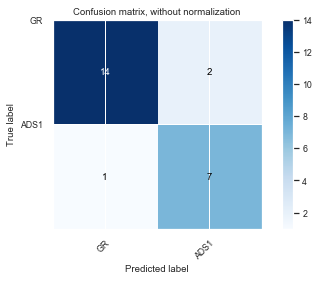

In [30]:
_ = plot_confusion_matrix(y_test, pred, class_names)

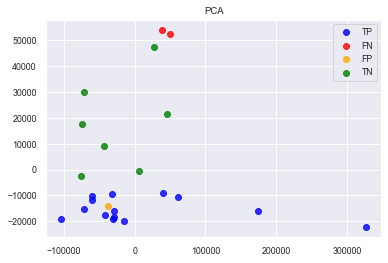

In [31]:
ypred = clf.predict(xtest).tolist()
xtest = xtest
ytest = ytest
plot_pca(ypred, xtest, ytest)

In [32]:
# Support Vector Machine
clf = svm.SVC(gamma='scale')
clf.fit(xtrain, ytrain)
svm_predict = clf.predict(xtest)
svm_predict

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR',
       'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1',
       'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'ADS1'],
      dtype=object)

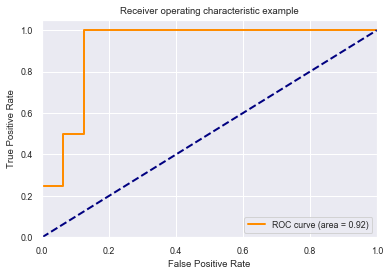

In [33]:
y_test = ytest.tolist()
y_test = [0 if x == ['ADS1'] else x for x in y_test]
y_test = [1 if x == ['GR'] else x for x in y_test]
y_score = clf.decision_function(xtest)
pred = clf.predict(xtest).tolist()
pred = [0 if x == 'ADS1' else x for x in pred]
pred = [1 if x == 'GR' else x for x in pred]
class_names = np.array(['GR', 'ADS1'])
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[16  0]
 [ 6  2]]
(2, 2)


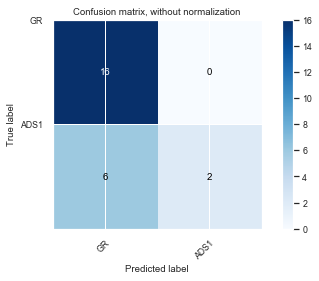

In [34]:
_ = plot_confusion_matrix(y_test, pred, class_names)

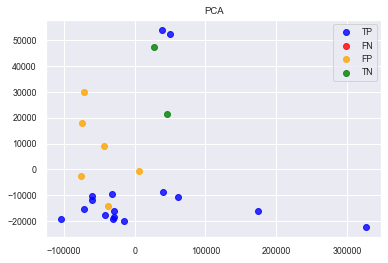

In [35]:
ypred = clf.predict(xtest).tolist()
xtest = xtest
ytest = ytest
plot_pca(ypred, xtest, ytest)

In [36]:
# Logistic Regression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(xtrain, ytrain)
lr_predict = clf.predict(xtest)
lr_predict

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array(['ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR', 'ADS1', 'GR', 'ADS1',
       'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'ADS1', 'GR', 'ADS1', 'GR',
       'ADS1', 'GR', 'ADS1', 'GR', 'GR', 'ADS1'], dtype=object)

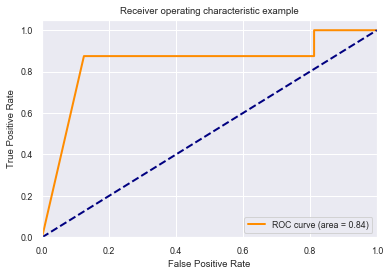

In [37]:
y_score = clf.predict_proba(xtest)[:,1]
y_test = ytest
y_test = [0 if x == 'ADS1' else x for x in y_test]
y_test = [1 if x == 'GR' else x for x in y_test]
pred = clf.predict(xtest).tolist()
pred = [0 if x == 'ADS1' else x for x in pred]
pred = [1 if x == 'GR' else x for x in pred]
class_names = np.array(['GR', 'ADS1'])
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[14  2]
 [ 1  7]]
(2, 2)


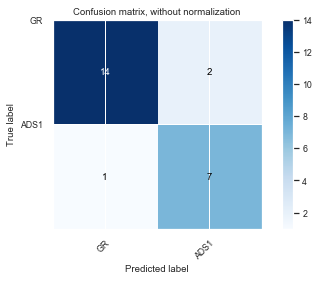

In [38]:
_ = plot_confusion_matrix(y_test, pred, class_names)

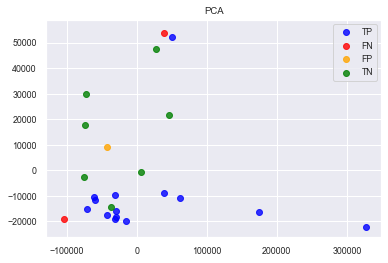

In [39]:
ypred = clf.predict(xtest).tolist()
xtest = xtest
ytest = ytest
plot_pca(ypred, xtest, ytest)

In [40]:
#Linear Discriminant Analysis
clf = LDA()
clf.fit(xtest, ytest)
lda_predict = clf.predict(xtest)
lda_predict

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array(['ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR',
       'ADS1', 'ADS1', 'ADS1', 'ADS1', 'GR', 'ADS1', 'ADS1', 'ADS1',
       'ADS1', 'GR', 'ADS1', 'GR', 'ADS1', 'GR', 'GR', 'ADS1'],
      dtype='<U4')

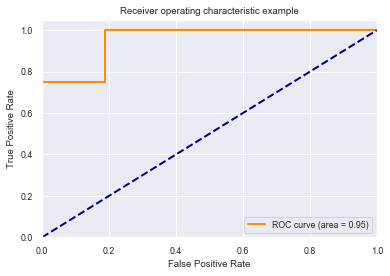

In [41]:
y_score = clf.predict_proba(xtest)[:,1]
y_test = ytest
y_test = [0 if x == 'ADS1' else x for x in y_test]
y_test = [1 if x == 'GR' else x for x in y_test]
pred = clf.predict(xtest).tolist()
pred = [0 if x == 'ADS1' else x for x in pred]
pred = [1 if x == 'GR' else x for x in pred]
class_names = np.array(['GR', 'ADS1'])
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[16  0]
 [ 2  6]]
(2, 2)


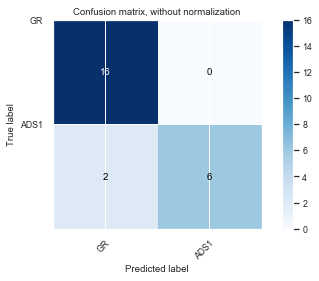

In [42]:
_ = plot_confusion_matrix(y_test, pred, class_names)

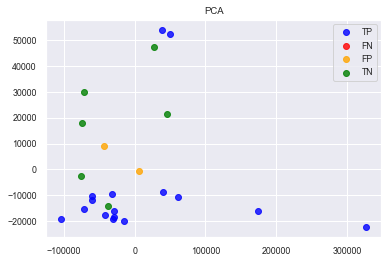

In [43]:
ypred = clf.predict(xtest).tolist()
xtest = xtest
ytest = ytest
plot_pca(ypred, xtest, ytest)

In [44]:
y_true = ytest.tolist()
y_true = [str(x)[2:-2] for x in y_true]
y_true
pre_df = pd.DataFrame({'True':y_true,'K-nearest Neighbors':knn_predict,\
                       'Random Forest':rf_predict, 'Gaussian Naive Bayes':gnb_predict,\
                      'Support Vector Machine':svm_predict, 'Logistic Regression':lr_predict,\
                      'Linear Discriminant Analysis':lda_predict})
pre_df = pre_df.transpose()
pre_df.to_csv('pre_df.csv', sep=',', header=True, index=True)
pre_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
True,ADS1,ADS1,ADS1,ADS1,ADS1,GR,ADS1,GR,ADS1,ADS1,...,ADS1,ADS1,ADS1,GR,ADS1,GR,ADS1,GR,GR,ADS1
K-nearest Neighbors,ADS1,ADS1,ADS1,ADS1,ADS1,GR,ADS1,GR,ADS1,ADS1,...,ADS1,ADS1,ADS1,GR,ADS1,GR,ADS1,GR,ADS1,ADS1
Random Forest,ADS1,ADS1,ADS1,ADS1,ADS1,GR,ADS1,GR,ADS1,ADS1,...,ADS1,GR,ADS1,GR,ADS1,GR,ADS1,GR,GR,ADS1
Gaussian Naive Bayes,ADS1,ADS1,ADS1,ADS1,ADS1,GR,ADS1,GR,ADS1,ADS1,...,ADS1,GR,GR,GR,ADS1,GR,ADS1,GR,GR,ADS1
Support Vector Machine,ADS1,ADS1,ADS1,ADS1,ADS1,ADS1,ADS1,GR,ADS1,ADS1,...,ADS1,ADS1,ADS1,ADS1,ADS1,ADS1,ADS1,GR,ADS1,ADS1
Logistic Regression,ADS1,ADS1,ADS1,GR,ADS1,GR,ADS1,GR,ADS1,ADS1,...,ADS1,GR,ADS1,GR,ADS1,GR,ADS1,GR,GR,ADS1
Linear Discriminant Analysis,ADS1,ADS1,ADS1,ADS1,ADS1,ADS1,ADS1,GR,ADS1,ADS1,...,ADS1,ADS1,ADS1,GR,ADS1,GR,ADS1,GR,GR,ADS1
